In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import lightning as L
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class BasicLightning(L.LightningModule):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

In [3]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

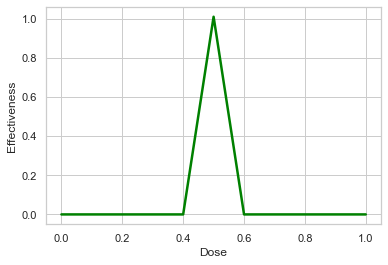

In [4]:
model = BasicLightning()
output_values = model(input_doses)

sns.set(style='whitegrid')

sns.lineplot(x=input_doses, y=output_values, color='green', linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.show()

In [5]:
class BasicLightningTrain(L.LightningModule):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

        self.learning_rate = 0.01
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

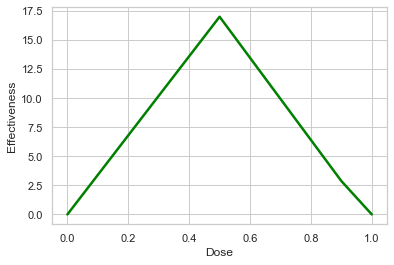

In [6]:
model = BasicLightningTrain()
output_values = model(input_doses)

sns.set(style='whitegrid')

sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.show()

In [7]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [91]:
class BasicLightningTrain(L.LightningModule):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

        self.learning_rate = 0.01
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

    def configure_optimizers(self):
        return SGD(self.parameters(), lr=self.learning_rate)
    
    def training_step(self, batch, batch_idx):
        try:
            input_i, label_i = batch[0][0], batch[0][1]
        except IndexError:
            input_i, label_i = batch[0], batch[1]
        output_i = self.forward(input_i)
        if output_i == None:
            output_i = torch.tensor([0.]).requires_grad_()
        else:
            print('nice')
        loss = (output_i - label_i) ** 2

        return loss

In [92]:
model = BasicLightningTrain()
trainer = L.Trainer(max_epochs=34)
tuner = L.pytorch.tuner.tuning.Tuner(trainer)

lr_find_results = tuner.lr_find(model=model,
                                train_dataloaders=[dataloader],
                                min_lr=0.001,
                                max_lr=1.0,
                                early_stop_threshold=None)

new_lr = lr_find_results.suggestion()
print("lr_find suggested learning rate: "+ str(new_lr) +".")
model.learning_rate = new_lr

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002137962089502232
Restoring states from the checkpoint path at c:\Users\eleoc\Desktop\WORK\Y4S2\Maths for Machine Learning\.lr_find_374c5fe2-7cbb-4ef8-82ce-9108264b3e25.ckpt
Restored all states from the checkpoint at c:\Users\eleoc\Desktop\WORK\Y4S2\Maths for Machine Learning\.lr_find_374c5fe2-7cbb-4ef8-82ce-9108264b3e25.ckpt


lr_find suggested learning rate: 0.002137962089502232.


In [75]:
trainer.fit(model, train_dataloaders=dataloader)

model.final_bias.data


  | Name | Type | Params
------------------------------
------------------------------
1         Trainable params
6         Non-trainable params
7         Total params
0.000     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=34` reached.


tensor(0.)

In [76]:
output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.show()

AttributeError: 'NoneType' object has no attribute 'detach'